In [1]:
# to install
!pip install vtreat
# https://github.com/WinVector/pyvtreat/

In [2]:
!pip install wvpy
# https://github.com/WinVector/wvpy/

Load modules/packages.

In [3]:
import pygam
import pandas
import numpy
import numpy.random
import seaborn
import matplotlib.pyplot 
import vtreat
import vtreat.util
import wvpy.util

Generate example data.

In [4]:
d = pandas.DataFrame({'x':[0.1*i for i in range(500)]})
d['y'] = numpy.sin(d['x']) + 0.1*numpy.random.normal(size=d.shape[0])
d['xc'] = ['level_' + str(5*numpy.round(yi/5, 1)) for yi in d['y']]
d['yc'] = d['y']>0.5
d.head()

,x,y,xc,yc
0,0.0,0.098340,level_0.0,False
1,0.1,0.096576,level_0.0,False
2,0.2,0.228247,level_0.0,False
3,0.3,0.194345,level_0.0,False
4,0.4,0.552893,level_0.5,True


In [5]:
numpy.mean(d['yc'])

0.338

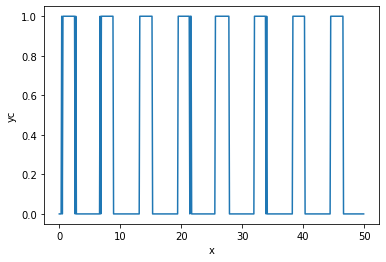

In [6]:
seaborn.lineplot(x='x', y='yc', data=d)

Build a classification model.

In [7]:
transform = vtreat.BinomialOutcomeTreatment(
    outcome_name='yc', 
    outcome_target=True,
    cols_to_copy=['y'])

In [8]:
d_prepared = transform.fit_transform(d, d['yc'])
d_prepared.head()

,y,yc,x,xc_logit_code,xc_prevalence_code,xc_lev_level_-1.0,xc_lev_level_1.0,xc_lev_level_0.5,xc_lev_level_-0.5
0,0.098340,False,0.0,-5.787501,0.086,0,0,0,0
1,0.096576,False,0.1,-5.787501,0.086,0,0,0,0
2,0.228247,False,0.2,-5.804694,0.086,0,0,0,0
3,0.194345,False,0.3,-5.787501,0.086,0,0,0,0
4,0.552893,True,0.4,0.513831,0.194,0,0,1,0


In [9]:
transform.score_frame_

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,recommended
0,x,x,clean_copy,False,True,-0.080893,7.072322e-02,1.0,True
1,xc_logit_code,xc,logit_code,True,True,0.848444,1.051460e-139,1.0,True
2,xc_prevalence_code,xc,prevalence_code,False,True,0.346707,1.438433e-15,1.0,True
3,xc_lev_level_-1.0,xc,indicator_code,False,True,-0.394933,4.120026e-20,4.0,True
4,xc_lev_level_1.0,xc,indicator_code,False,True,0.756231,8.557270e-94,4.0,True
5,xc_lev_level_0.5,xc,indicator_code,False,True,0.232999,1.366610e-07,4.0,True
6,xc_lev_level_-0.5,xc,indicator_code,False,True,-0.332509,2.261254e-14,4.0,True


Look at `xc_logit_code`.

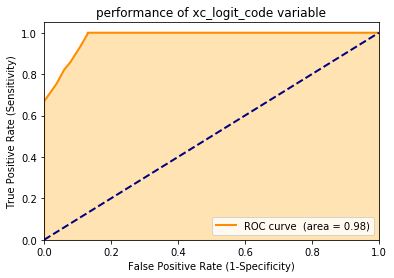

0.9775648474230859

In [10]:
wvpy.util.plot_roc(prediction=d_prepared['xc_logit_code'], 
                   istrue=d_prepared['yc'],
                   title = 'performance of xc_logit_code variable')

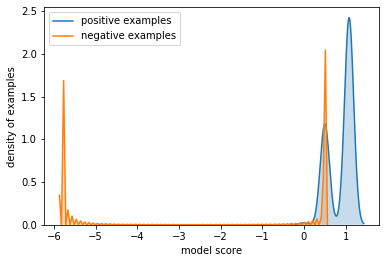

In [11]:
wvpy.util.dual_density_plot(probs=d_prepared['xc_logit_code'], 
                            istrue=d_prepared['yc'])

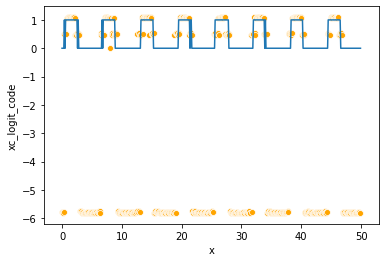

In [12]:
seaborn.lineplot(x='x', y='yc', data=d_prepared)
seaborn.scatterplot(x='x', y='xc_logit_code', data=d_prepared, 
                    color='orange')

Look at `xc_prevalence_code`.

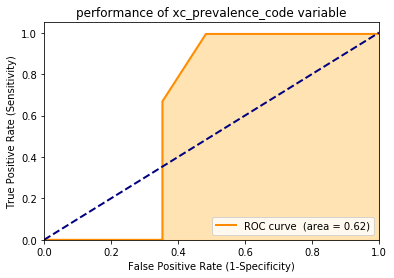

0.6215609860741165

In [13]:
wvpy.util.plot_roc(prediction=d_prepared['xc_prevalence_code'], 
                   istrue=d_prepared['yc'],
                   title = 'performance of xc_prevalence_code variable')

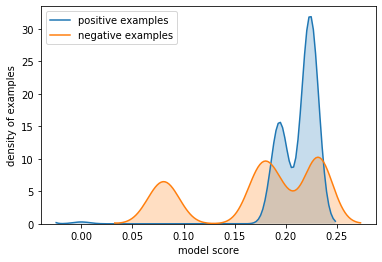

In [14]:
wvpy.util.dual_density_plot(probs=d_prepared['xc_prevalence_code'], 
                            istrue=d_prepared['yc'])

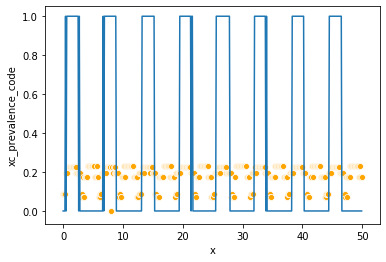

In [15]:
seaborn.lineplot(x='x', y='yc', data=d_prepared)
seaborn.scatterplot(x='x', y='xc_prevalence_code', data=d_prepared, 
                    color='orange')